<h1>Activation Functions</h1>
<h1>______________________________________</h1>
<br>


Activation function of a node defines the output of that node given an input or set of inputs.

<h4>Importing Dependencies</h4>

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

Now lets implement a basic function that plots a surface for an arbitary function. The plot is done for all possible values of weights and bias between -0.5 and 0.5 with a step 0.05(like -0.5,-0.45,-0.40...0.45,0.5). The input, the weight, and the bias are one-dimensional. Additionally, the input can be passed as an argument

In [6]:
def plot_act(i = 1.0, actfunc = lambda x: x):
    ws = np.arange(-0.5,0.5,0.05)
    bs = np.arange(-0.5,0.5,0.05)
    
    X,Y = np.meshgrid(ws, bs)
    
    os = np.array([actfunc(tf.constant(w*i + b)).eval(session=sess) \
                   for w,b in zip(np.ravel(X), np.ravel(Y))])
    Z = os.reshape(X.shape)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z, rstride=1, cstride=1)

<b>Basic Structure</b>


In [7]:
# start a session
sess = tf.Session()
# create a simple input of 3 real value
i = tf.constant([1.0, 2.0, 3.0], shape=[1,3])
# create a matrix of weight
w = tf.random_normal(shape=[3,3])
# create a vector of biases
b = tf.random_normal(shape=[1,3])
# dummy activation function
def func(x): return x
# tf.matmul will multiply the input-i tensor, and the weight-w tensor then sum the result with the bias-b tensor
act = func(tf.matmul(i,w) + b)
# evaluate the tensor to a numpy array
act.eval(session=sess)

array([[ 1.4927242, 12.759068 ,  6.2176495]], dtype=float32)

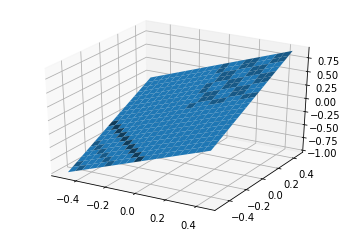

In [8]:
plot_act(1.0, func)

<h2>Step Functions</h2>

It consist of a simple threshold function that varies the Y value from 0 to 1. Its generally used for classification problems, like Logistic Regression with two classes.

Tensorflow doesn't have a step function..

<h2>Sigmoid Function</h2>

These are very useful in the sense that they "squash" their given inputs into a bounded interval. 


<h3>Logistic Regression(sigmoid)</h3>

It is defined as 
$f(x) = \dfrac{1}{1+e^{-x}}$
Having a Output range : (0,1)

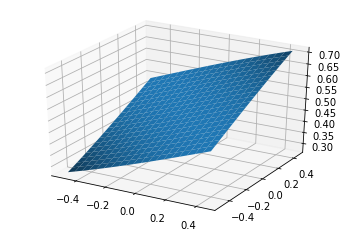

In [9]:
plot_act(1, tf.sigmoid)

<b>Using sigmoid in a neural net layer</b>


In [10]:
act = tf.sigmoid(tf.matmul(i,w) + b)
act.eval(session=sess)

array([[0.10593813, 0.7657192 , 0.04316109]], dtype=float32)

<h3>Tanh</h3>
<br>
The tanh is defined as $f(x) = \dfrac{2}{1+e^{-2x}} - 1$ Having an output range: (-1, 1)

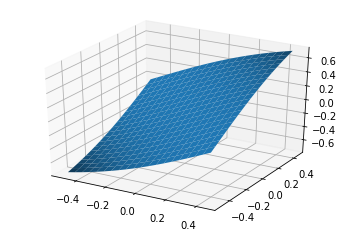

In [11]:
plot_act(1, tf.tanh)

<b>Using tanh in neural net layer</b>

In [12]:
act = tf.tanh(tf.matmul(i,w) + b)
act.eval(session= sess)

array([[-0.9956826, -0.9901364,  0.9993685]], dtype=float32)

<h2>Linear Unit Function</h2>

Here the function returns 0 for x < 0 and x for x>0 it has a range of 0 to inf

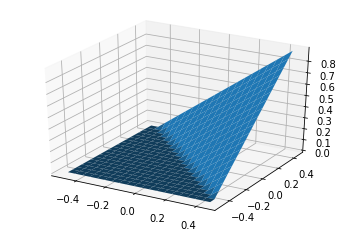

In [13]:
plot_act(1, tf.nn.relu)

<b>Using relu in neural net layer</b>

In [16]:
act = tf.nn.relu(tf.matmul(i,w) + b)
act.eval(session = sess)

array([[0.        , 2.6670341 , 0.68921494]], dtype=float32)